<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-2-Sprint-2-Regression/blob/master/Artin%20Sinani%20-%20Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
%matplotlib inline
from ipywidgets import interact
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [54]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)

df['date'] = pd.to_datetime(df['date'])

print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
# X = df.drop(columns='price')
df['pp_sqft'] = df['price'] / df['sqft_living']

X = df.drop(columns=['price', 'date'])
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 20) (4323, 20) (17290,) (4323,)


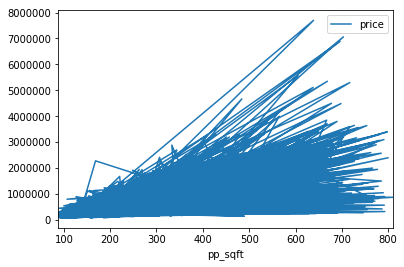

In [57]:
# Looks like what I used to call art in the third grade
df.plot(x='pp_sqft', y='price');

Feature: id
Mean Squared Error: 151352603171.0557
Square Root(MSE): 389040.6189217981
R2_Score: -0.0011634788954812958


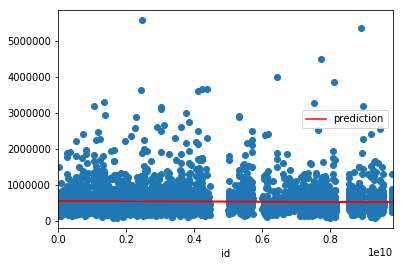

Feature: bedrooms
Mean Squared Error: 136910807648.61537
Square Root(MSE): 370014.60464232403
R2_Score: 0.09436575511711587


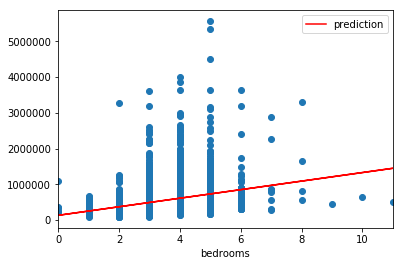

Feature: bathrooms
Mean Squared Error: 110412721329.78845
Square Root(MSE): 332284.09731702245
R2_Score: 0.26964464512105624


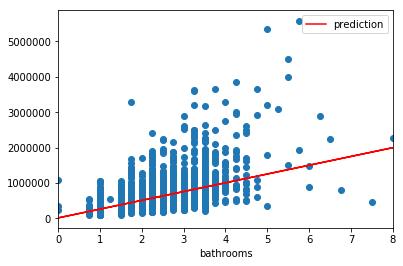

Feature: sqft_living
Mean Squared Error: 76484977061.77612
Square Root(MSE): 276559.1746114674
R2_Score: 0.49406905389089006


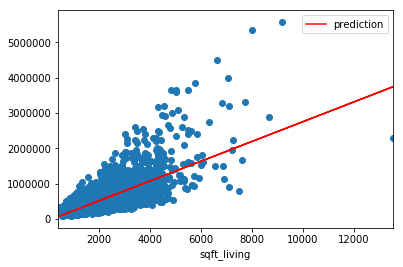

Feature: sqft_lot
Mean Squared Error: 150243188828.6073
Square Root(MSE): 387612.1629007626
R2_Score: 0.006175047825244251


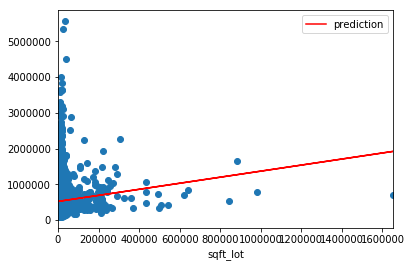

Feature: floors
Mean Squared Error: 140508862448.248
Square Root(MSE): 374845.1179463966
R2_Score: 0.07056543067614418


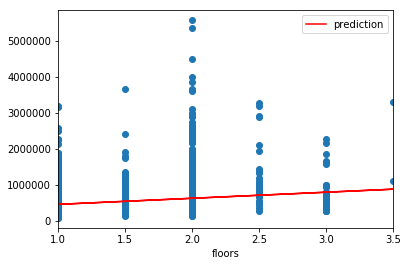

Feature: waterfront
Mean Squared Error: 137008115409.98103
Square Root(MSE): 370146.0730711337
R2_Score: 0.09372208612926058


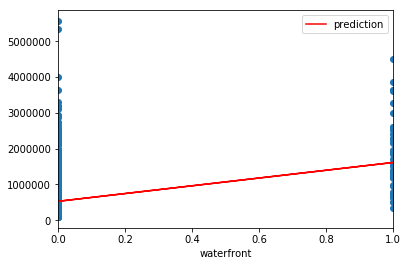

Feature: view
Mean Squared Error: 125341588925.98198
Square Root(MSE): 354036.14070597646
R2_Score: 0.17089353872823654


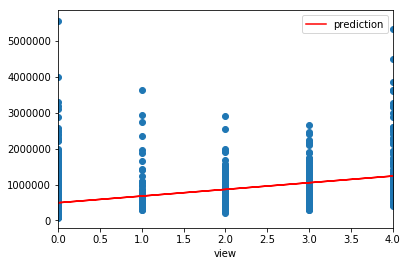

Feature: condition
Mean Squared Error: 151109952013.50565
Square Root(MSE): 388728.6354431657
R2_Score: 0.00044160401661275106


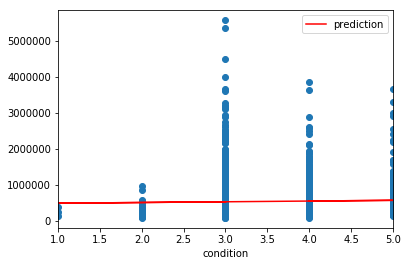

Feature: grade
Mean Squared Error: 82340423990.71077
Square Root(MSE): 286950.2116930928
R2_Score: 0.45533658748438455


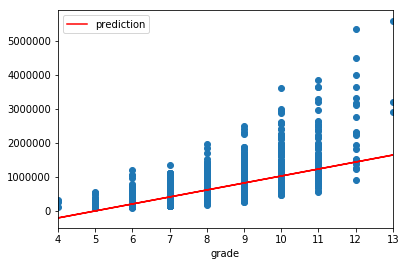

Feature: sqft_above
Mean Squared Error: 94392651194.5846
Square Root(MSE): 307233.870519812
R2_Score: 0.37561381124490334


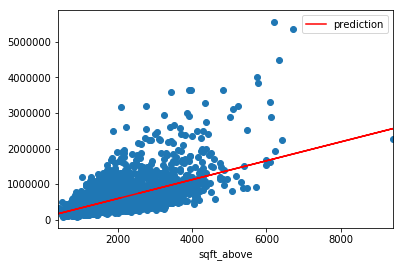

Feature: sqft_basement
Mean Squared Error: 134626081668.89368
Square Root(MSE): 366914.2701897729
R2_Score: 0.10947870436448293


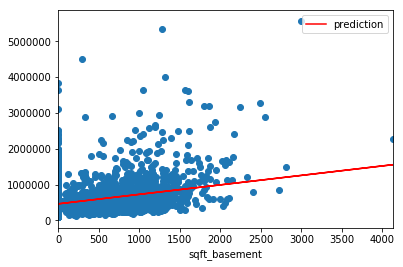

Feature: yr_built
Mean Squared Error: 150629178055.31534
Square Root(MSE): 388109.75001320866
R2_Score: 0.003621815776830406


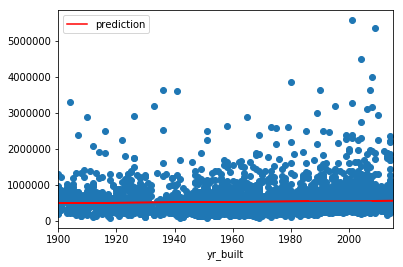

Feature: yr_renovated
Mean Squared Error: 149062484828.83035
Square Root(MSE): 386086.1106396219
R2_Score: 0.01398513961881942


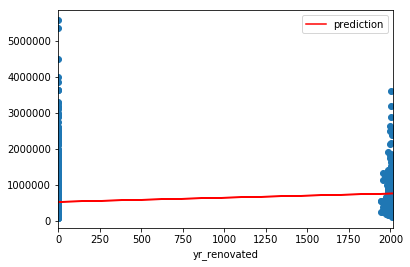

Feature: zipcode
Mean Squared Error: 150916312388.63306
Square Root(MSE): 388479.4877321492
R2_Score: 0.0017224866471569067


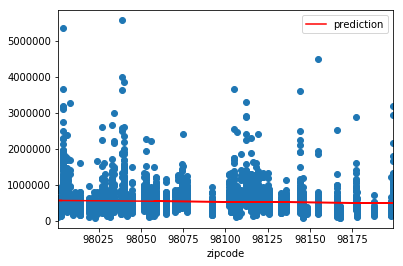

Feature: lat
Mean Squared Error: 138274285742.30392
Square Root(MSE): 371852.50535972446
R2_Score: 0.08534665374009986


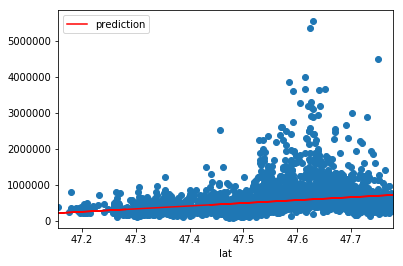

Feature: long
Mean Squared Error: 151285621470.94858
Square Root(MSE): 388954.52365404955
R2_Score: -0.0007204099921618301


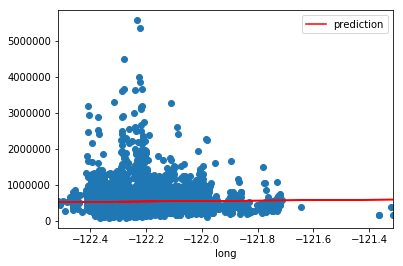

Feature: sqft_living15
Mean Squared Error: 97841202861.70013
Square Root(MSE): 312795.7845970756
R2_Score: 0.3528024164498089


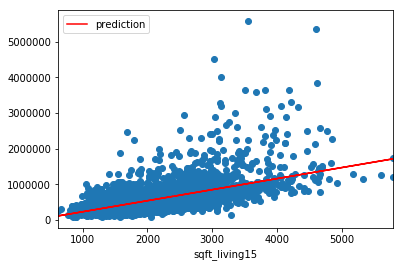

Feature: sqft_lot15
Mean Squared Error: 150021458113.8139
Square Root(MSE): 387326.0359358946
R2_Score: 0.007641746706859465


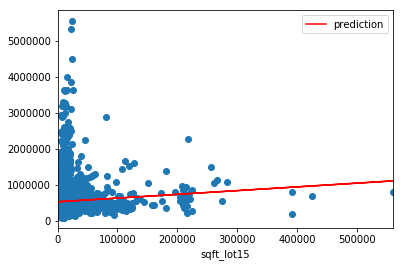

Feature: pp_sqft
Mean Squared Error: 103419309275.07393
Square Root(MSE): 321588.72690919053
R2_Score: 0.3159044952680312


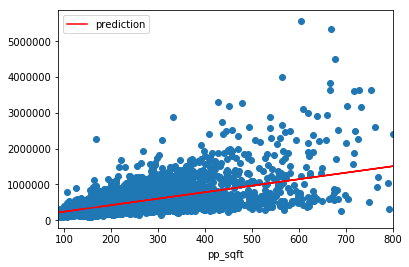

In [58]:
# Graphed all features to get a better visual idea of models
for feature in X_train.columns:
  X = X_train[[feature]]
  y = y_train

  model = LinearRegression()
  model.fit(X,y)
  X_test['prediction'] = model.predict(X_test[[feature]])

  print('Feature:',feature)
  print('Mean Squared Error:',mean_squared_error(y_true=y_test, y_pred=X_test['prediction']))
  print('Square Root(MSE):',np.sqrt(mean_squared_error(y_true=y_test, y_pred=X_test['prediction'])))
  print('R2_Score:',r2_score(y_test,model.predict(X_test[[feature]])))

  X_test.plot(x=feature,y='prediction',kind='line',color='r')
  plt.scatter(x=X_test[[feature]],y=y_test)
  plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
from mpl_toolkits import mplot3d

In [60]:
# Using two variables (features) for multiple regression
feature = ['sqft_living', 'pp_sqft']

X = X_train[feature]
y = y_train

model = LinearRegression()
model.fit(X,y)

X_test['prediction'] = model.predict(X_test[feature])


print('Feature:', feature)
print()
print('Mean Squared Error: ', mean_squared_error(y_true=y_test, y_pred=X_test['prediction']))
print()
print('Sqrt(MSE): ', np.sqrt(mean_squared_error(y_true=y_test, y_pred=X_test['prediction'])))
print()
print('R^2 Score: ',r2_score(y_test, X_test['prediction']))

Feature: ['sqft_living', 'pp_sqft']

Mean Squared Error:  19114886209.765404

Sqrt(MSE):  138256.59553802633

R^2 Score:  0.8735593205831313


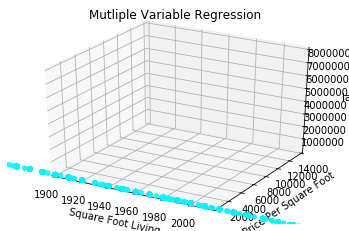

In [61]:
# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['sqft_living'], df['lat'], df['grade'], c=df['price'], cmap='cool')

plt.title('Mutliple Variable Regression')

ax.set_zlabel('lat');
plt.xlabel('Square Foot Living')
plt.ylabel('Price Per Square Foot')

ax.set_xlim(1900,2015)
ax.set_ylim(200,14000)
ax.set_zlim(70000, 8000000)

plt.show();

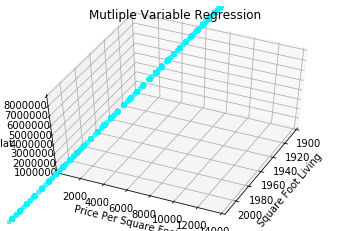

In [62]:
ax.view_init(50,25)
fig

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
# Features

feature = list(X_train.columns)

X = X_train[feature]
y = y_train # df['price']



In [0]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13832, 20), (3458, 20), (13832,), (3458,))

In [68]:
# Train Model

reg = LinearRegression().fit(X, y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# from sklearn.linear_model import LinearRegression

beta_0 = reg.intercept_
beta_1 = reg.coef_

In [80]:
print("Intercept: " , beta_1)
print("Coefficients: ", beta_0)

Intercept:  [-1.16003723e-06 -1.79093847e+03  1.72671428e+04  1.93352336e+02
 -1.48497692e-01 -2.03445621e+04  2.30954499e+05  1.46301881e+04
  5.31790931e+03  1.93241810e+04  1.00747957e+02  9.26043791e+01
 -2.14802720e+02  1.09583809e+01 -1.39947570e+02 -4.92867189e+04
 -1.47134172e+04 -2.82661481e+01 -1.39020623e-01  1.99519263e+03]
Coefficients:  13991865.740798146


In [0]:
feature = df.drop(columns='price')
target = df['price']

In [99]:
# RMSE

rmse = np.sqrt(mean_squared_error(target, feature))

TypeError: ignored

In [100]:
# R^2 Value

r2_value = LinearRegression().score(feature, target)

NotFittedError: ignored

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
